In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
nba = pd.read_csv('merged_data_fuzzy.csv')

/Users/BYOD/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (26,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
nba

,actionNumber,clock,timeActual,period,periodType,actionType,subType,qualifiers,personId,x,...,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,clock_total_seconds.y,clock_diff
0,180,PT00M00.00S,2024-11-13T00:37:54.700Z,1,REGULAR,period,end,NaN,0,NaN,...,58,-142,568,1,0,20241112,BOS,ATL,0,0
1,165,PT01M00.00S,2024-11-13T00:35:40Z,1,REGULAR,2pt,Layup,pointsinthepaint,1627759,93.249014,...,3,38,11,1,1,20241112,BOS,ATL,60,0
2,163,PT01M11.00S,2024-11-13T00:35:27.400Z,1,REGULAR,2pt,Jump Shot,NaN,1630700,11.645861,...,12,110,57,1,1,20241112,BOS,ATL,71,0
3,162,PT01M31.00S,2024-11-13T00:35:07.700Z,1,REGULAR,2pt,Layup,"pointsinthepaint, fromturnover, fastbreak",1627759,92.591984,...,3,28,17,1,1,20241112,BOS,ATL,91,0
4,158,PT01M51.00S,2024-11-13T00:34:48.300Z,1,REGULAR,3pt,Jump Shot,"fromturnover, fastbreak",1628369,68.676084,...,26,-116,242,1,1,20241112,BOS,ATL,111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222727,576,PT09M37.00S,2024-12-15T03:42:48.400Z,4,REGULAR,2pt,DUNK,pointsinthepaint,1628392,93.643233,...,0,-2,7,1,1,20241214,OKC,HOU,577,0
222728,549,PT11M08.00S,2024-12-15T03:37:37.900Z,4,REGULAR,3pt,Jump Shot,2ndchance,1631106,27.545992,...,25,-150,206,1,0,20241214,OKC,HOU,668,0
222729,548,PT11M12.00S,2024-12-15T03:37:33.700Z,4,REGULAR,rebound,offensive,NaN,1630578,NaN,...,1,-8,6,1,0,20241214,OKC,HOU,672,0
222730,547,PT11M14.00S,2024-12-15T03:37:31.700Z,4,REGULAR,2pt,Jump Shot,NaN,1641708,21.369908,...,14,2,148,1,0,20241214,OKC,HOU,674,0


In [4]:
# All column names:
print(nba.columns)

Index(['actionNumber', 'clock', 'timeActual', 'period', 'periodType',
       'actionType', 'subType', 'qualifiers', 'personId', 'x', 'y',
       'possession', 'scoreHome', 'scoreAway', 'edited', 'orderNumber',
       'isTargetScoreLastPeriod', 'xLegacy', 'yLegacy', 'isFieldGoal', 'side',
       'description', 'personIdsFilter', 'teamId', 'teamTricode', 'descriptor',
       'jumpBallRecoveredName', 'jumpBallRecoverdPersonId', 'playerName',
       'playerNameI', 'jumpBallWonPlayerName', 'jumpBallWonPersonId',
       'jumpBallLostPlayerName', 'jumpBallLostPersonId', 'area', 'areaDetail',
       'shotDistance', 'shotResult', 'blockPlayerName', 'blockPersonId',
       'shotActionNumber', 'reboundTotal', 'reboundDefensiveTotal',
       'reboundOffensiveTotal', 'officialId', 'turnoverTotal',
       'stealPlayerName', 'stealPersonId', 'pointsTotal',
       'assistPlayerNameInitial', 'assistPersonId', 'assistTotal',
       'foulPersonalTotal', 'foulTechnicalTotal', 'foulDrawnPlayerName',
      

# Research question ideas:

- Modelling **shot success**. Model the probability of a shot success as the response variable $Y_i$, dependent on: period $X_i \in \{1,2,3,4\}$, time (minutes) remaining $X_2 \in [0,12]$, shot location x-coord $X_3 \in [0,100]$, shot location y-coord $X_4 \in [0,100]$, shot type (categorical), shot zone/area (categorical), shot distance. To answer the question: Are the basketball shots more likely to succeed if they are closer?

    - this could be done as a statistical modelling approach, for example logistic regression, or by using ML classification methods. Decision tree classifier, gradient boosting, random forest, SVMs are some ideas.
    - an idea could be to try multiple of these methods and compare their performance.

- Modelling **shot distance**. Model the shot distance $Y_i \in [0,94]$ as a function of period $X_1 \in \{1,2,3,4\}$, time remaining $X_2 \in [0,12]$, player (categorical). Are players more likely to make further/riskier shots towards the end of a game, or is this more dependent on player? How dependent on player is it?

    - As a statistical model, this could be done using a GLMM, with period as a fixed effect/level, and player as a fixed effect. Response distribution - exponential? 
    - Shot distance is not linear: there appear to be two main peaks - the first being around 0 (close to the hoop) and the second being around 20-25 feet, corresponding to the 3pt line. See plot below. Could a mixture model be suitable for $Y_i$? Or a Bayesian approach, with a heavy prior on $Y=0$ and $Y\approx 23$?
        
- using the scoreHome and scoreAway values, can we break the dataset down into cases where there is a close match between games, vs cases where there is much more discrepancy between team's values?

    - An idea could be to create a score discrepancy value? This has the potential to be a more 'unique/novel' thing we can do. The discrepancy score could be some kind of metric, e.g. absolute value or squared distance between the home score and the away score.
    - the discrepancy score would make the most sense to be included as a independent variable/feature in some of the above analyses.

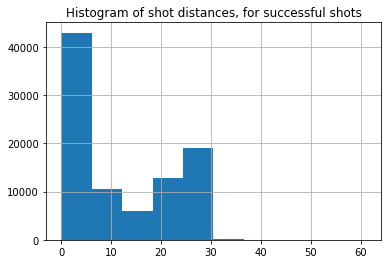

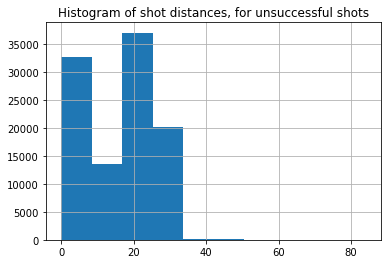

In [5]:
# Shot Distance is not linear - notice the peaks close to a distance of 0, and a distance of approx. 25 feet
nba[nba['shotResult']=='Made']['SHOT_DISTANCE'].hist()
plt.title('Histogram of shot distances, for successful shots')
plt.show()
nba[nba['shotResult']=='Missed']['SHOT_DISTANCE'].hist()
plt.title('Histogram of shot distances, for unsuccessful shots')
plt.show()

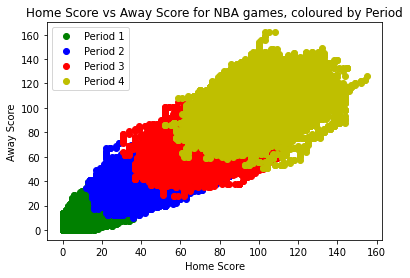

In [15]:
# plots of home score vs away score
plt.plot(nba[nba['period']==1]['scoreHome'],
         nba[nba['period']==1]['scoreAway'],'go')
plt.plot(nba[nba['period']==2]['scoreHome'],
         nba[nba['period']==2]['scoreAway'],'bo')
plt.plot(nba[nba['period']==3]['scoreHome'],
         nba[nba['period']==3]['scoreAway'],'ro')
plt.plot(nba[nba['period']==4]['scoreHome'],
         nba[nba['period']==4]['scoreAway'],'yo')
plt.xlabel('Home Score')
plt.ylabel('Away Score')
plt.legend(['Period 1','Period 2','Period 3','Period 4'])
plt.title('Home Score vs Away Score for NBA games, coloured by Period')
plt.show()